# ДЗ 1. Линейная регрессия

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Читаем датасет

In [120]:
data = pd.read_csv('Shanghai_HMT_2010.csv')

In [121]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (52584, 17)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,-7.0,59.21,1023.0,0.0,SE,11.0,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,-6.0,59.48,1023.0,1.0,SE,14.0,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,-5.0,64.18,1023.0,1.0,SE,17.0,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,-3.0,69.43,1023.0,2.0,SE,20.0,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,-2.0,64.90,1023.0,4.0,SE,23.0,0.0,0.0


In [122]:
# Проверим данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             52584 non-null  int64  
 1   year           52584 non-null  int64  
 2   month          52584 non-null  int64  
 3   day            52584 non-null  int64  
 4   hour           52584 non-null  int64  
 5   season         52584 non-null  int64  
 6   PM_Jingan      24700 non-null  float64
 7   PM_US Post     34039 non-null  float64
 8   PM_Xuhui       25189 non-null  float64
 9   DEWP           52571 non-null  float64
 10  HUMI           52571 non-null  float64
 11  PRES           52556 non-null  float64
 12  TEMP           52571 non-null  float64
 13  cbwd           52572 non-null  object 
 14  Iws            52572 non-null  float64
 15  precipitation  48575 non-null  float64
 16  Iprec          48575 non-null  float64
dtypes: float64(10), int64(6), object(1)
memory usage: 

#### Выбрасываем все NaN'ы

In [123]:
data = data.dropna() 

In [124]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (21436, 17)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
26304,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0
26305,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0
26307,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0
26308,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0
26309,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,SW,70.0,0.0,0.0
26310,26311,2013,1,1,6,4,74.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,71.0,0.0,0.0
26311,26312,2013,1,1,7,4,73.0,80.0,84.0,-4.0,86.15,1024.0,-2.0,cv,0.0,0.0,0.0
26312,26313,2013,1,1,8,4,77.0,76.0,87.0,-5.0,79.89,1024.0,-2.0,cv,1.0,0.0,0.0
26313,26314,2013,1,1,9,4,73.0,74.0,91.0,-3.0,60.25,1025.0,4.0,SW,4.0,0.0,0.0
26314,26315,2013,1,1,10,4,82.0,76.0,88.0,-4.0,48.63,1025.0,6.0,SW,8.0,0.0,0.0


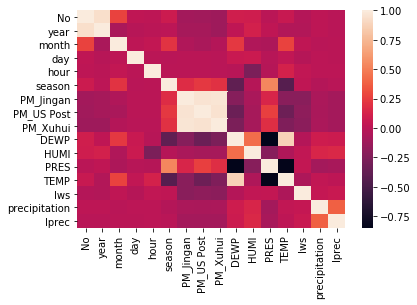

In [125]:
list_of_column_names = data.columns
sns.heatmap(data[list_of_column_names].corr(method="pearson"))

#### Удаляем столбец с категориальным признаком - cbwd

In [126]:
# data_columns = data[['PM_Jingan', 'PM_Xuhui']]
numeric_data = data.drop(['cbwd'], axis=1)
# data_for_norm = data_for_norm.drop(['PM_Jingan'], axis=1)
# data_for_norm = data_for_norm.drop(['PM_Xuhui'], axis=1)  # Не заметил разницы
numeric_data

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
26304,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,60.0,0.0,0.0
26305,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,62.0,0.0,0.0
26307,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,65.0,0.0,0.0
26308,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,68.0,0.0,0.0
26309,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,70.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52578,52579,2015,12,31,18,4,93.0,92.0,90.0,-2.0,60.51,1035.0,5.0,12.0,0.0,0.0
52579,52580,2015,12,31,19,4,86.0,82.0,90.0,-1.0,65.13,1035.0,5.0,15.0,0.0,0.0
52580,52581,2015,12,31,20,4,83.0,93.0,86.0,1.0,70.27,1035.0,6.0,19.0,0.0,0.0
52581,52582,2015,12,31,21,4,85.0,90.0,95.0,1.0,70.27,1036.0,6.0,22.0,0.0,0.0


#### Нормализация

In [127]:
data = (numeric_data - numeric_data.mean()) / numeric_data.std()

In [128]:
print("data.shape = ", data.shape)


data.shape =  (21436, 16)


#### Разбиваем данные на тест и трейн

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X = data[['DEWP','HUMI', 'Iprec', 'Iws']]
y = data['PRES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
# установим random_state, чтобы результаты эксперимента были воспроизводимы

Линейная регрессия

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score

In [132]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [133]:
predictions, y_test

(array([ 0.68023687,  0.16807651,  0.05530361, ...,  1.24239279,
         0.12854896, -0.81838044]),
 33964    0.551580
 51577    0.774887
 28006   -0.788263
 28817   -1.234877
 47283   -0.788263
            ...   
 34521    0.328273
 36334    1.444809
 26677    1.333155
 27883   -0.118342
 41563   -0.564956
 Name: PRES, Length: 7074, dtype: float64)

In [134]:
mean_squared_error(predictions, y_test)

0.25131497045922835

#### Коэффициенты модели

In [135]:
w_0 = model.intercept_
w_1 = model.coef_[0]
print("w_0 = ", w_0)
print("w_1 = ", w_1)

w_0 =  -0.0006308971572682215
w_1 =  -0.925196295099161


In [136]:
model.coef_

array([-0.9251963 ,  0.19532889, -0.03088812,  0.0074467 ])

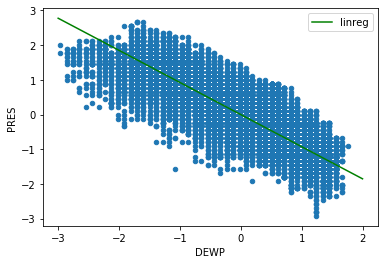

In [143]:
f = lambda x: w_0 + w_1 * x
x = np.linspace(-3, 2, 100)
y_1 = f(x)

data.plot(x='DEWP', y='PRES', kind='scatter')
plt.plot(x, y_1, label='linreg', color='g')

plt.xlabel('DEWP')
plt.ylabel('PRES')
plt.legend(loc='best')
plt.show()

#### Используем все данные

In [144]:
X = data.drop(['PRES'], axis=1)
y = data['PRES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [145]:
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказанные значения целевой переменной
predictions = model.predict(X_test)

In [146]:
mean_squared_error(predictions, y_test)

0.18037975139437648

In [147]:
model.coef_

array([ 3.03621052e+01, -2.92495158e+01, -1.03126140e+01, -8.39803979e-01,
       -2.21872261e-02,  9.10113213e-02, -1.72001593e-02,  5.19615708e-02,
       -1.08463538e-01,  3.05099921e-01, -4.03486066e-01, -1.10607333e+00,
       -1.96402402e-02, -1.96141877e-02, -1.53164842e-02])

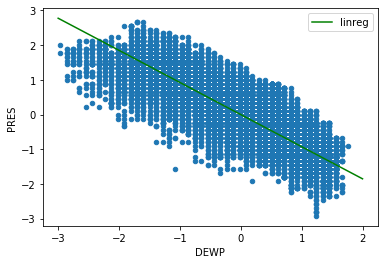

In [148]:
f = lambda x: w_0 + w_1 * x
x = np.linspace(-3, 2, 100)
y_1 = f(x)

data.plot(x='DEWP', y='PRES', kind='scatter')
plt.plot(x, y_1, label='linreg', color='g')

plt.xlabel('DEWP')
plt.ylabel('PRES')
plt.legend(loc='best')
plt.show()